# Dataset and Domain

 
- Data Dictionary 
- Variable categorization (count of numeric and categorical)
- Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)
- Alternate sources of data that can supplement the core dataset (at least 2-3 columns)
- Project Justification -  Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value



In [20]:
import pandas as pd

df = pd.read_csv(r'C:\Users\hp\Downloads\archive (21)\smartphones.csv')

df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [21]:
df.dtypes

Smartphone      object
Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price    float64
dtype: object

In [22]:
df.shape

(1816, 8)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [24]:
df.describe()

,RAM,Storage,Final Price
count,1333.00000,1791.000000,1816.000000
mean,5.96099,162.652150,492.175573
std,2.66807,139.411605,398.606183
min,1.00000,2.000000,60.460000
25%,4.00000,64.000000,200.990000
50%,6.00000,128.000000,349.990000
75%,8.00000,256.000000,652.717500
max,12.00000,1000.000000,2271.280000


In [25]:
df.select_dtypes(include='object').describe()

,Smartphone,Brand,Model,Color,Free
count,1816,1816,1816,1816,1816
unique,1816,37,383,17,2
top,Realme C55 8/256GB Sunshower Libre,Samsung,iPhone 13,Black,Yes
freq,1,458,60,537,1772


In [26]:
df_num = df.select_dtypes(exclude='object').columns

df_cat = df.select_dtypes(include='object').columns

In [27]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [28]:
# target variable Final price.

# target variable is floaing point number so it is regression type.


In [29]:
# null_values

df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [30]:
df.drop('Smartphone',axis=1,inplace=True)

# smartphone column contains total unique values are 1816 so we drop that column beacuse this column 
# is not helpful for us to make predictions.

In [31]:
df_cat = df.select_dtypes(include='object')

In [32]:
for i in df_cat:
    print(df[i].value_counts())
    print('----------------------------------------')

    # value counts for categorical columns.

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64
----------------------------------------
Model
iPhone 13       60
iPhone 14       59
iPhone 12       54
Galaxy S23      53
11 Pro          46
                ..
Jasper 2         1
A53s             1
G21              1
A57              1
Pocophone F2     1
Name: count, Length: 383, dtype: int64
-------

In [33]:
# duplicates

df[df.duplicated(keep='first')]  # there are so many duplicated rows so we have to remove it.

,Brand,Model,RAM,Storage,Color,Free,Final Price
58,Xiaomi,Redmi A1,2.0,32.0,Black,Yes,109.00
234,Motorola,Edge 40,8.0,256.0,Gold,Yes,491.64
348,Motorola,Razr 40,8.0,256.0,Gold,Yes,899.01
465,Samsung,Galaxy S21,8.0,256.0,Gray,Yes,649.00
562,Samsung,Galaxy S20,6.0,128.0,Blue,Yes,649.00
699,Samsung,Galaxy A14,4.0,128.0,Black,Yes,209.00
790,Apple,iPhone SE,NaN,64.0,Black,Yes,439.00
812,Samsung,Galaxy Z Fold4,12.0,256.0,Green,Yes,1799.00
847,Cubot,X70,12.0,256.0,Black,Yes,249.95
1005,Realme,7,8.0,128.0,Blue,Yes,239.00


In [34]:
df.drop_duplicates(keep='first',inplace=True)

In [35]:
df[df.duplicated()]  # now we deleting rows from data

,Brand,Model,RAM,Storage,Color,Free,Final Price


# Data Exploration (EDA)

Relationship between variables
- Check for 

o multi-collinearity

o distribution of variables

o presence of outliers and its treatment 

o statistical significance of variables

o class imbalance and its treatment



In [36]:
df.dtypes

Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price    float64
dtype: object

In [37]:
df_numerical = df[['RAM','Storage','Final Price']]

In [38]:
import seaborn as sns

<Axes: >

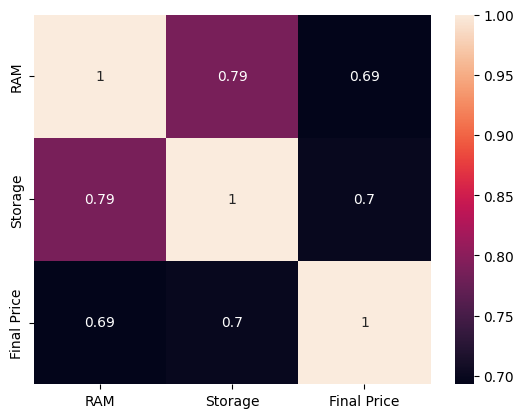

In [39]:
# Multicolinearity in ind.variables

sns.heatmap(df_numerical.corr(),annot=True)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

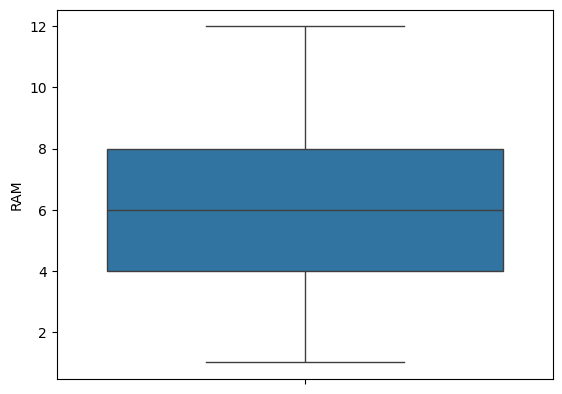

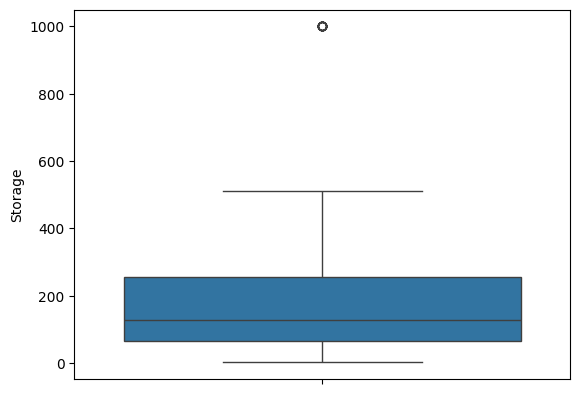

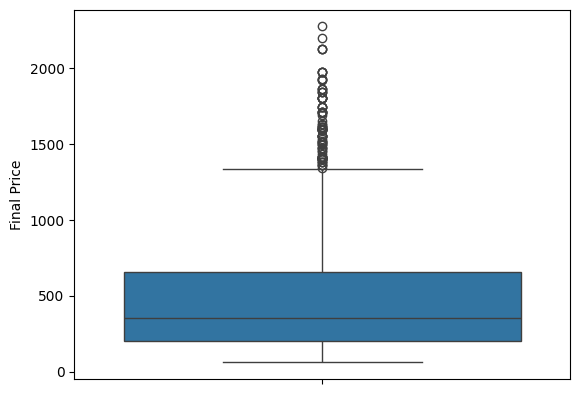

In [41]:
# checking for outliers

for i in df_num:
    sns.boxplot(df[i])
    plt.show()
    

In [42]:
df.columns

Index(['Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free', 'Final Price'], dtype='object')

In [43]:
df.dtypes

Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price    float64
dtype: object

In [44]:
df.isnull().sum()

Brand            0
Model            0
RAM            482
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [45]:
# imputing null values

df['RAM'] = df['RAM'].fillna(df['RAM'].mean())

df['Storage'] = df['Storage'].fillna(df['Storage'].mean())

In [46]:
df.isnull().sum()  # null values are removed

Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

In [47]:
# Outlier_treatment...

q1 = df_numerical.quantile(0.25)

q3 = df_numerical.quantile(0.75)

iqr = q3 - q1 

ll = q1 - (1.5*iqr)

ul = q3 + (1.5*iqr)

df = df[~((df_numerical<ll) | (df_numerical>ul)).any(axis=1)]

df.shape

(1709, 7)

In [48]:
df1 = df.copy()

In [49]:
df1.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


# Visualizations

<Axes: xlabel='Final Price', ylabel='RAM'>

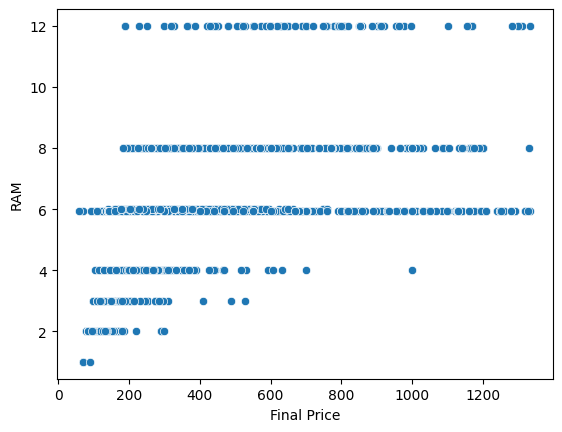

In [50]:
sns.scatterplot(data=df,x='Final Price',y='RAM')

<Axes: xlabel='Color', ylabel='Storage'>

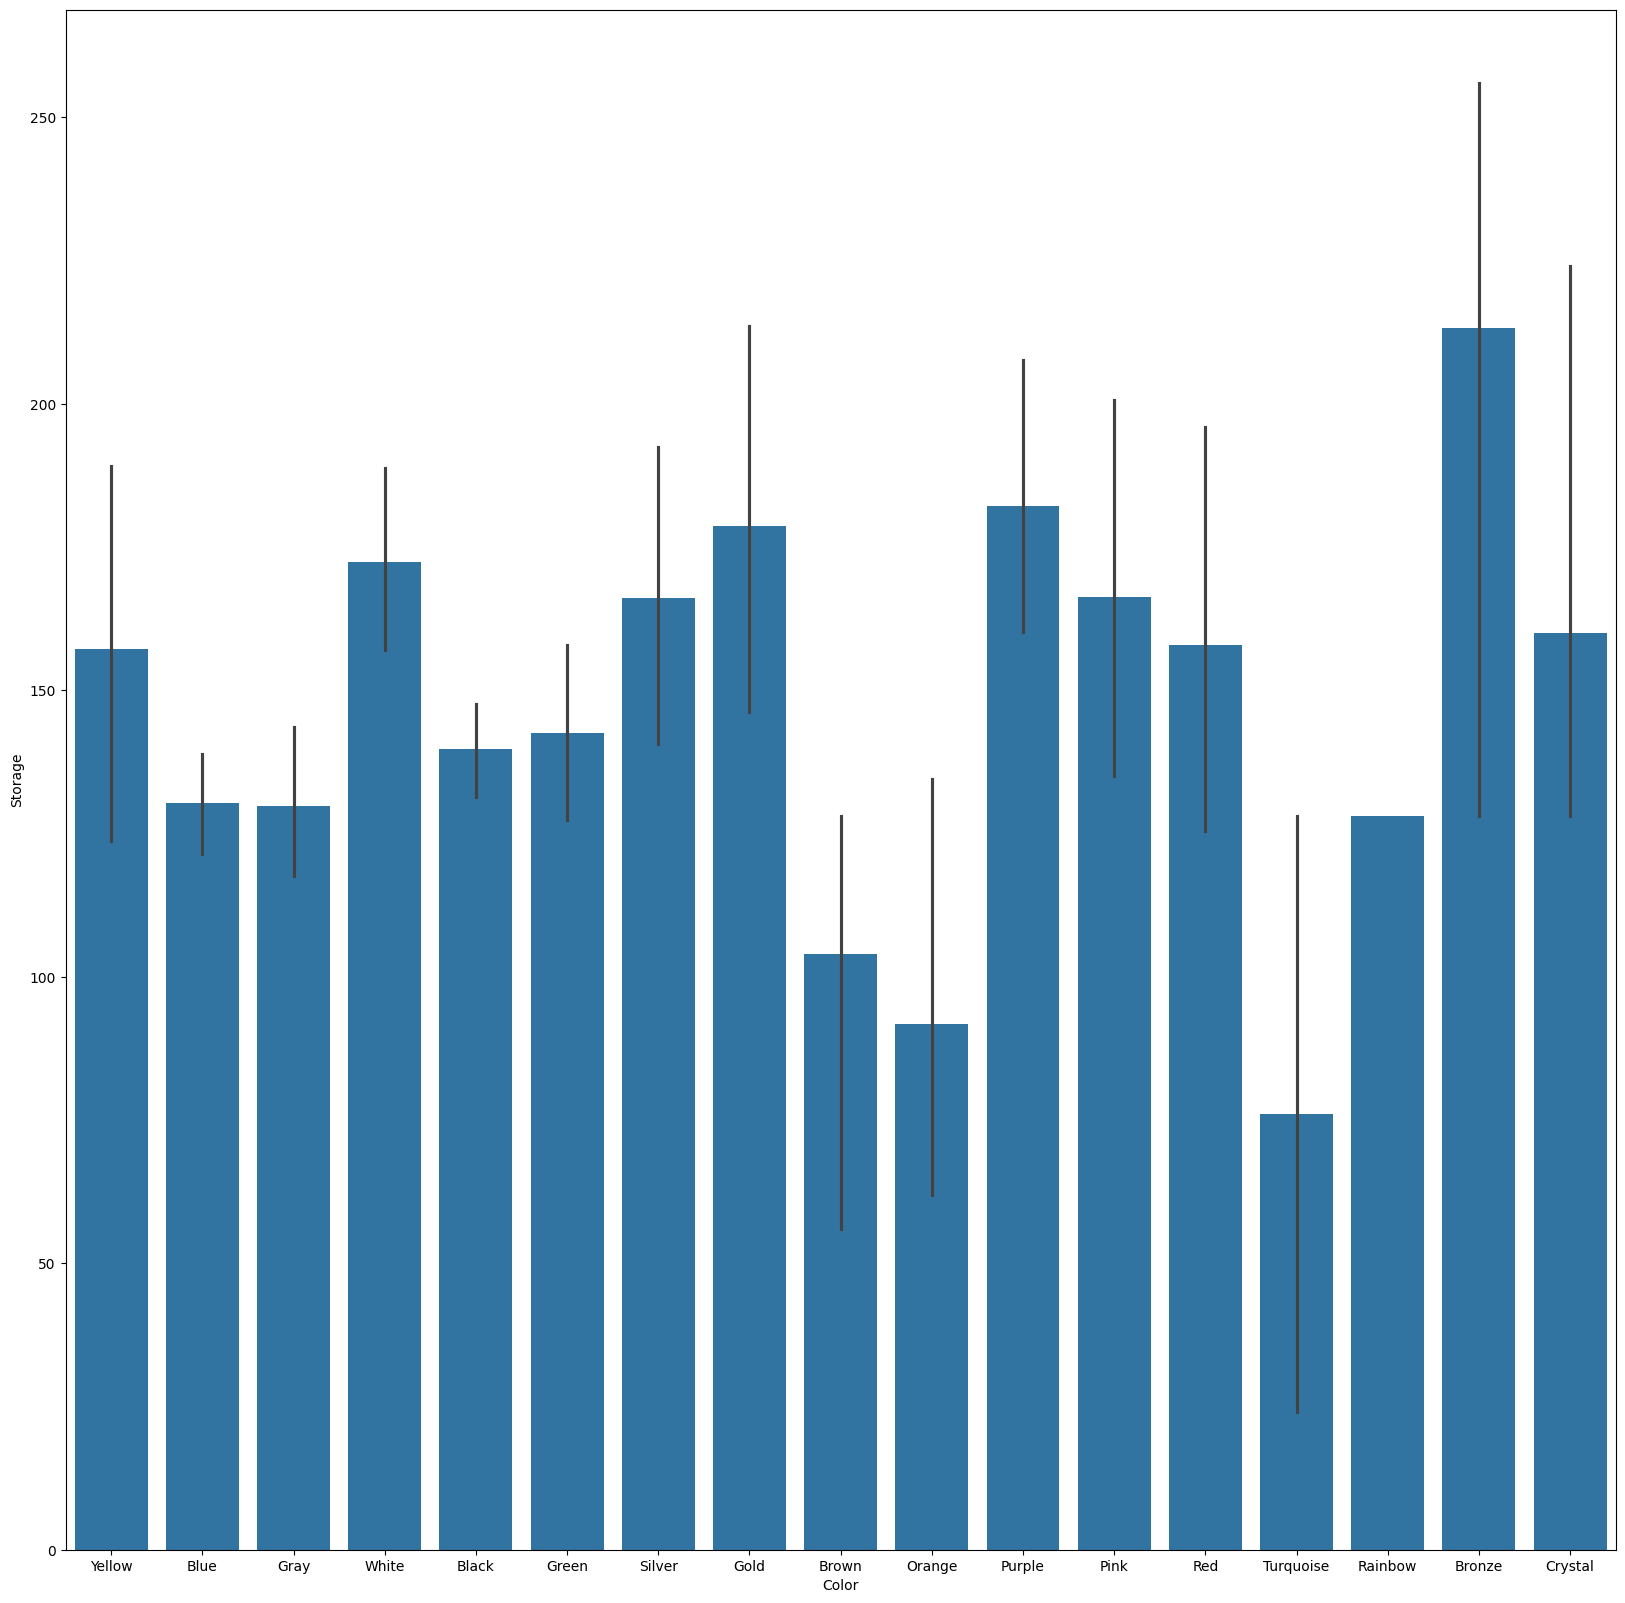

In [51]:
plt.figure(figsize=(20,20))

sns.barplot(data=df,x='Color',y='Storage')

<Axes: xlabel='Final Price', ylabel='Storage'>

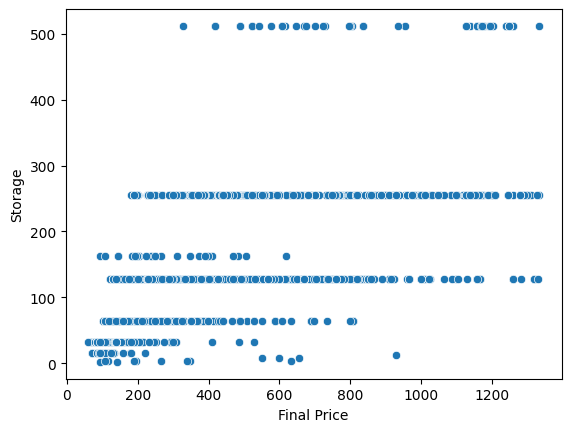

In [52]:
sns.scatterplot(data=df,x='Final Price',y='Storage')

<Axes: xlabel='Storage', ylabel='RAM'>

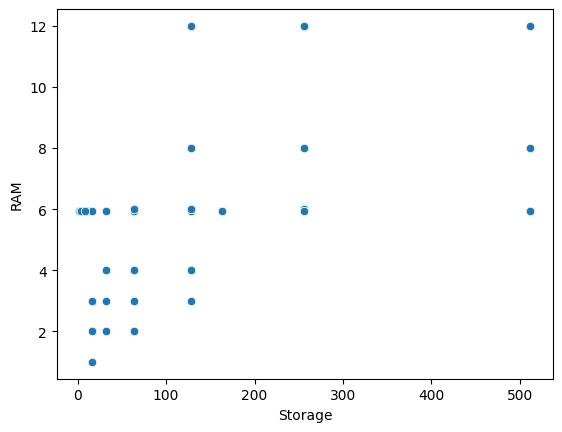

In [53]:
sns.scatterplot(data=df,x='Storage',y='RAM')

<Axes: xlabel='Brand'>

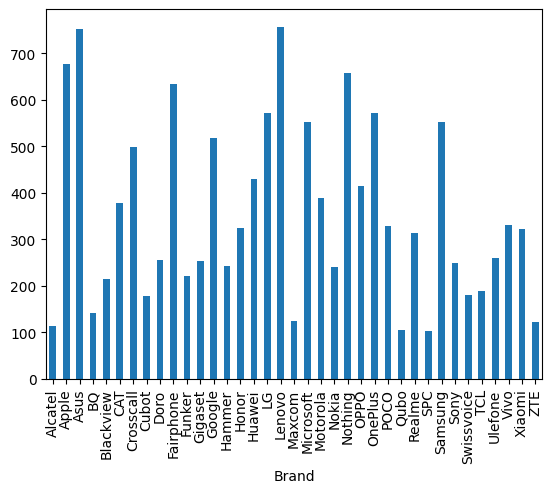

In [54]:
df.groupby('Brand')['Final Price'].mean().plot(kind='bar')

<Figure size 1500x1500 with 0 Axes>

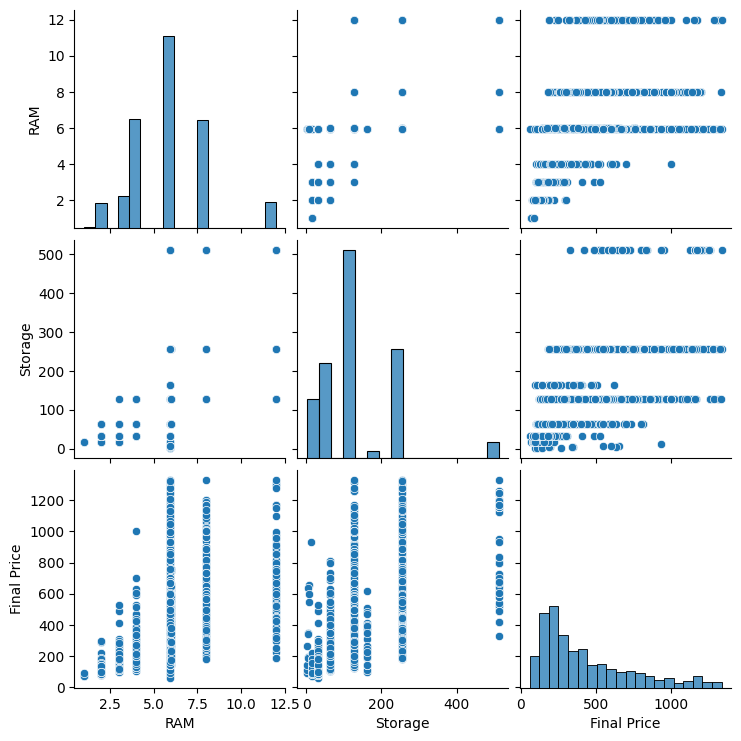

In [55]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df)


<Axes: xlabel='Color'>

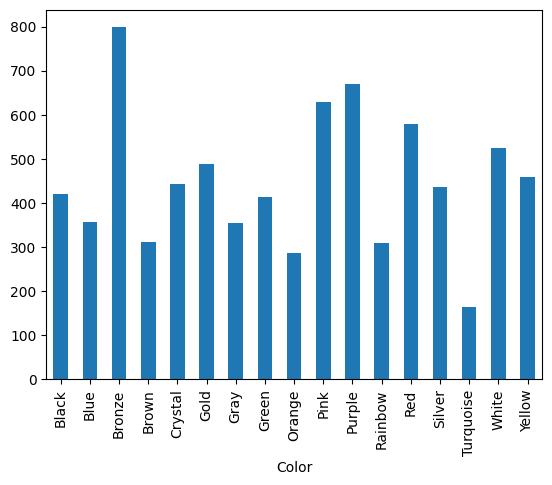

In [56]:
df.groupby('Color')['Final Price'].mean().plot(kind='bar')

# Feature Engineering


- Whether any transformations required
- Scaling the data
- Feature selection 
- Dimensionality reduction


In [57]:
# converting object columns to int type.(because model not accepting objects)

df = pd.get_dummies(data=df,columns=['Brand', 'Model', 'Color', 'Free'],dtype='int',drop_first=True)

In [58]:
df.head()

,RAM,Storage,Final Price,Brand_Apple,Brand_Asus,Brand_BQ,Brand_Blackview,Brand_CAT,Brand_Crosscall,Brand_Cubot,...,Color_Orange,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow,Free_Yes
0,8.0,256.0,231.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,4.0,128.0,279.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,128.0,179.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6.0,128.0,279.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12.0,512.0,799.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [59]:
df.shape

(1709, 437)

In [60]:
df.dtypes

RAM                float64
Storage            float64
Final Price        float64
Brand_Apple          int32
Brand_Asus           int32
                    ...   
Color_Silver         int32
Color_Turquoise      int32
Color_White          int32
Color_Yellow         int32
Free_Yes             int32
Length: 437, dtype: object

In [61]:
std = StandardScaler()

list1 = df[['RAM','Storage']]

for i in list1:
    df[i] = std.fit_transform(df[[i]])

In [62]:
df.head()

,RAM,Storage,Final Price,Brand_Apple,Brand_Asus,Brand_BQ,Brand_Blackview,Brand_CAT,Brand_Crosscall,Brand_Cubot,...,Color_Orange,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow,Free_Yes
0,0.935989,1.111001,231.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-0.834549,-0.168941,279.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.834549,-0.168941,179.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.050720,-0.168941,279.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.706526,3.670886,799.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# Model Building

In [63]:
from sklearn.model_selection import train_test_split


x = df.drop('Final Price',axis=1)
y = df['Final Price']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=100)

In [64]:
from sklearn.metrics import mean_absolute_percentage_error

In [65]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR_model = LR.fit(xtrain,ytrain)
train_pred = LR_model.predict(xtrain)
test_pred = LR_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest,test_pred)*100)


train_error: 15.175323288164847
test_error: 64203351732.4096


In [66]:
# why this model is overfit ??

# answer :- when model performimg well in training and bad performing in testing is called ovefitting 
# model.

# regularization 

In [67]:
from sklearn.linear_model import Lasso

In [68]:
# lasso,ridge and elastic net we are using when model overfitting

l = Lasso()
l_model = l.fit(xtrain,ytrain)
train_pred = l_model.predict(xtrain)
test_pred = l_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest,test_pred)*100)


train_error: 31.604560079605807
test_error: 30.9323485591664


In [69]:
from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor()
SGD_model = SGD.fit(xtrain,ytrain)
train_pred = SGD_model.predict(xtrain)
test_pred = SGD_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest,test_pred)*100)


train_error: 21.513890164297617
test_error: 26.700053308574432


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [70]:
# SGD model lookig is very good is good in training and testing also

In [71]:
from sklearn.ensemble import RandomForestRegressor

RD = RandomForestRegressor()
RD_model = RD.fit(xtrain,ytrain)
train_pred = RD_model.predict(xtrain)
test_pred = RD_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest,test_pred)*100)


train_error: 10.223237840234086
test_error: 23.3144482616899


In [72]:
# RandomForest looking good in both training and testing 

# GSCV

In [73]:
from sklearn.metrics import r2_score

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[50,150,200,70]}

GSCV = GridSearchCV(estimator=RD,param_grid=parameters,scoring=r2_score,n_jobs=-1)
GSCV_model = GSCV.fit(xtrain,ytrain)

print('best_hyperparameters:', GSCV_model.best_params_)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


best_hyperparameters: {'n_estimators': 50}


In [77]:
# tuned_model 

tuned_model = RandomForestRegressor(n_estimators=50)
tuned_model_1 = tuned_model.fit(xtrain,ytrain)
train_pred = tuned_model_1.predict(xtrain)
test_pred = tuned_model_1.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest,test_pred)*100)


train_error: 10.30395742962023
test_error: 23.70882351849279


In [76]:
# tuned model and random_forest models are looking good

# we can proceed with tuned model or randomforestregressormodel for prediction